In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [5]:
df=pd.read_csv('economic_index.csv')

In [6]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [9]:
#drop unnecessary columns 
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)


In [11]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

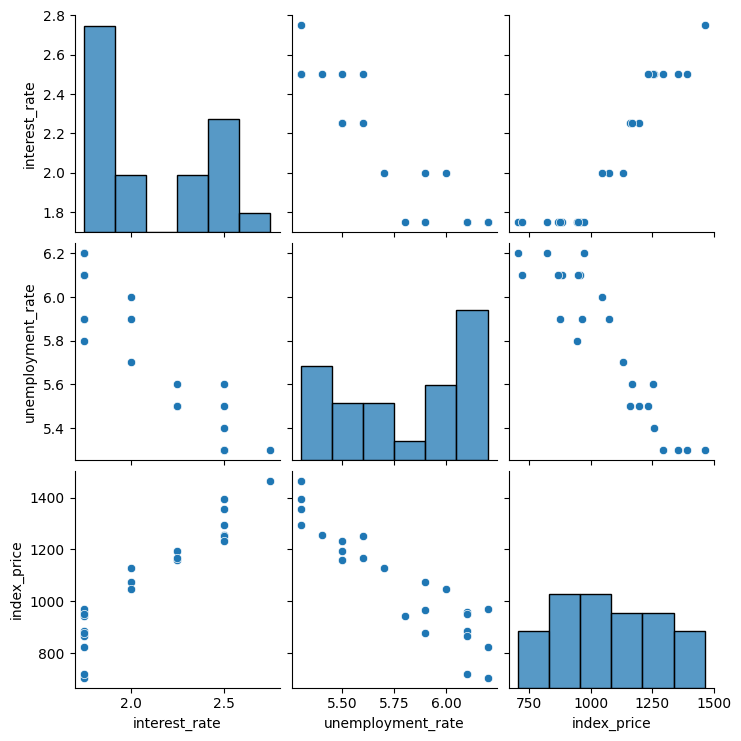

In [12]:
#lets do some visualization
import seaborn as sns
sns.pairplot(df)

In [13]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

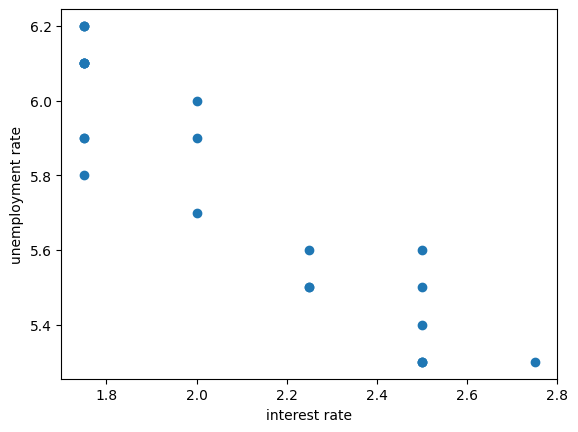

In [16]:
#visualize the data points more clearly 
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel('interest rate')
plt.ylabel('unemployment rate')

In [19]:
#independent and dependent feature 
X= df[['interest_rate','unemployment_rate']]
y= df['index_price']

In [20]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [21]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [27]:
from sklearn.preprocessing import StandardScaler



In [28]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



In [29]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()

In [30]:
le.fit(X_train,y_train)

LinearRegression()

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(le,X_train,y_train,scoring='neg_mean_squared_error',cv=3)


In [35]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [36]:
#prediction
y_pred=le.predict(X_test)



In [37]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [38]:
#performance metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mean squareed error",mse)
print("mean absolute error",mae)
print("root mean squared ",rmse)

mean squareed error (8     1159
16     971
0     1464
18     884
11    1075
9     1167
Name: index_price, dtype: int64, array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693]))
mean absolute error 59.935781523235484
root mean squared  [[34.04408906 31.1608729  38.26225294 29.73213749 32.78719262 34.16138171]
 [34.70198415 28.66444695 37.50350655 29.28666755 31.54219274 34.17849217]]


In [39]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8278978091457145


In [40]:
#assum ptions 


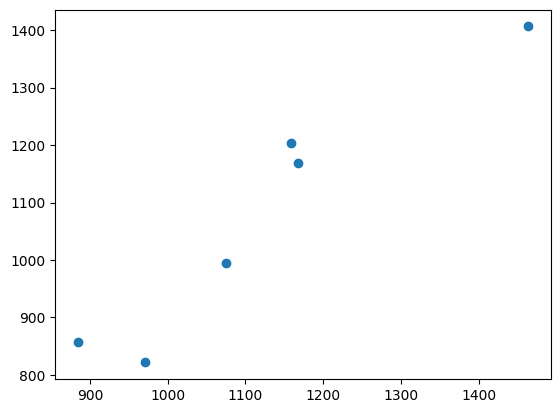

In [41]:
plt.scatter(y_test,y_pred)

In [ ]:
residu